# Applied Capstone Project - Analysing the effect of Covid-19

In [59]:
#importing all the neccesary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
!pip install covid
from covid import Covid
import folium
import io
from geopy.geocoders import Nominatim 
from sklearn.preprocessing import StandardScaler

In [4]:
# importing data
total_confirmed_cases = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_cases.csv")
total_confirmed_cases.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
total_deaths = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv")
total_deaths.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [144]:
new_confirmed_cases = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/new_cases.csv")
new_confirmed_cases.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [20]:
new_deaths = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/new_deaths.csv")
new_deaths.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [203]:
population_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/locations.csv")
population_data.head()

,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0


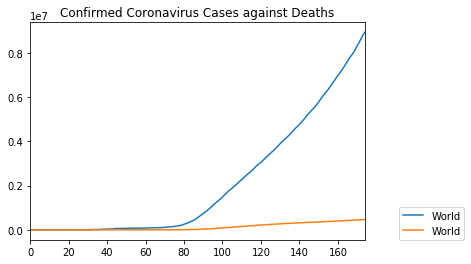

In [139]:
#visualising data
total_confirmed_cases['date']=pd.to_datetime(total_confirmed_cases['date'])
total_confirmed_cases['World'].plot.line(title='Confirmed Coronavirus Cases against Deaths')
total_deaths['World'].plot.line(title='Confirmed Coronavirus Cases against Deaths')
plt.legend(bbox_to_anchor=(1.2, 0.00001),loc=8, borderaxespad=0.)

In [10]:
mobility_report_covid['retail_and_recreation_percent_change_from_baseline'].plot.line

<bound method SeriesPlotMethods.line of <pandas.plotting._core.SeriesPlotMethods object at 0x7f07df49ae10>>

In [141]:
top5affectedcountries = ['United States','Brazil','Russia','India','United Kingdom']

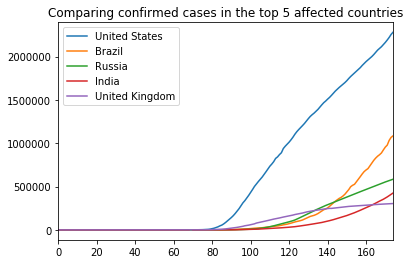

In [142]:
total_confirmed_cases.plot.line(y=top5affectedcountries,title="Comparing confirmed cases in the top 5 affected countries")

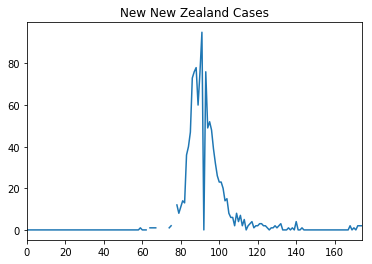

In [108]:
new_confirmed_cases['New Zealand'].plot.line(title="New New Zealand Cases")

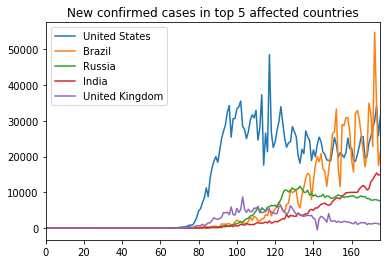

In [145]:
new_confirmed_cases.plot.line(y=top5affectedcountries, title="New confirmed cases in top 5 affected countries")

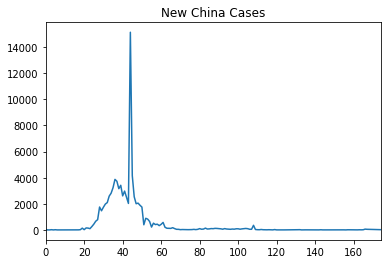

In [111]:
new_confirmed_cases['China'].plot.line(title="New China Cases")

In [11]:
cases_last15_days = total_confirmed_cases.tail(15)

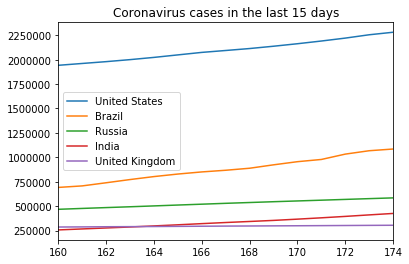

In [113]:
cases_last15_days[top5affectedcountries].plot.line(title='Coronavirus cases in the last 15 days')

Text(0.5, 1.0, 'New Confirmed Cases in India and the United States')

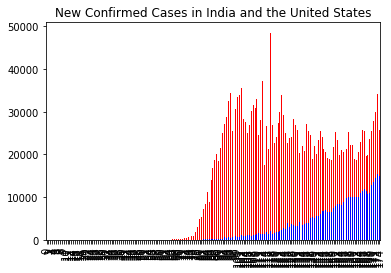

In [143]:
df_usa.plot(kind = 'bar', x = 'date', y = df_usa.values, color = 'red')
df_india.plot(kind = 'bar', x = 'date', y = df_india.values, color = 'blue')
plt.title("New Confirmed Cases in India and the United States")

In [27]:
covid_data = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
covid_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [34]:
covid_data2 = covid_data.drop("date", axis=1)
covid_data2.head()

,location,new_cases,new_deaths,total_cases,total_deaths
0,Afghanistan,0,0,0,0
1,Afghanistan,0,0,0,0
2,Afghanistan,0,0,0,0
3,Afghanistan,0,0,0,0
4,Afghanistan,0,0,0,0


In [35]:
covid_data2.sort_values("location", inplace = True) 
covid_data2.drop_duplicates(subset ="location", keep ='last', inplace = True)
covid_data2.head()

,location,new_cases,new_deaths,total_cases,total_deaths
58,Afghanistan,0,0,1,0
194,Albania,16,1,377,22
331,Algeria,0,0,1,0
472,Andorra,8,0,646,29
577,Angola,0,0,25,2


In [41]:
f = pd.merge(population_data,covid_data2,on='location')
f.head()

,countriesAndTerritories,location,continent,population_year,population,new_cases,new_deaths,total_cases,total_deaths
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0,0,0,1,0
1,Albania,Albania,Europe,2020.0,2877800.0,16,1,377,22
2,Algeria,Algeria,Africa,2020.0,43851043.0,0,0,1,0
3,Andorra,Andorra,Europe,2020.0,77265.0,8,0,646,29
4,Angola,Angola,Africa,2020.0,32866268.0,0,0,25,2


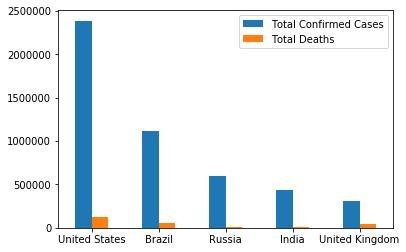

In [45]:
cases = [2388225, 1111348, 599705, 441643, 305289]
deaths = [122611, 51407, 8359, 14027,42647]
index = ['United States', 'Brazil', 'Russia','India', 'United Kingdom']
df = pd.DataFrame({'Total Confirmed Cases': cases,'Total Deaths': deaths}, index=index)
deaths_vs_cases = df.plot.bar(rot=0)

In [188]:
new_york_covid = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv')
new_york_covid.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,381,1616.94,23563.03,22,93.37,11.50,3312
1,10002,Chinatown/Lower East Side,Manhattan,1080,1407.07,76755.41,152,198.03,16.13,6697
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,460,854.99,53801.62,34,63.20,8.84,5204
3,10004,Financial District,Manhattan,32,876.57,3650.61,1,27.39,9.38,341
4,10005,Financial District,Manhattan,64,762.26,8396.11,2,23.82,8.50,753


In [199]:
new_york_covid.sort_values("BOROUGH_GROUP", inplace = True) 
new_york_covid.drop_duplicates(subset ="BOROUGH_GROUP", inplace = True)
new_york_covid

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
78,10473,Castle Hill/Clason Point/Soundview,Bronx,1958,3161.88,61925.28,129,208.32,23.72,8254
89,11201,Brooklyn Heights/DUMBO/Downtown Brooklyn,Brooklyn,726,1191.96,60908.15,89,146.12,9.02,8052
1,10002,Chinatown/Lower East Side,Manhattan,1080,1407.07,76755.41,152,198.03,16.13,6697
146,11377,Woodside,Queens,2316,2678.43,86468.55,185,213.95,20.14,11501
46,10303,Graniteville/Mariner's Harbor/Port Ivory,Staten Island,895,3411.91,26231.66,44,167.74,24.68,3627


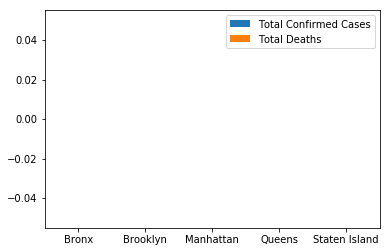

In [198]:
cases = 
index = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
df = pd.DataFrame({'Total Confirmed Cases': cases,'Total Deaths': new_york_covid["COVID_DEATH_COUNT"]}, index=index)
deaths_vs_cases = df.plot.bar(rot=0)

In [124]:
CLIENT_ID = 'T2MI0S1JM14K0D0SUHSPICCEYPC4HUZWTIQIEJBCWBCWGMGJ' # your Foursquare ID
CLIENT_SECRET = '1O3XQFY2IKYTDXODD0EO3YRWCM0X52IOAVVBBXRNIHVCF0W1' # your Foursquare Secret
VERSION = '20200621'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T2MI0S1JM14K0D0SUHSPICCEYPC4HUZWTIQIEJBCWBCWGMGJ
CLIENT_SECRET:1O3XQFY2IKYTDXODD0EO3YRWCM0X52IOAVVBBXRNIHVCF0W1


In [153]:
from pandas.io.json import json_normalize
url='https://api.foursquare.com/v2/venues/trending?&client_id=T2MI0S1JM14K0D0SUHSPICCEYPC4HUZWTIQIEJBCWBCWGMGJ&client_secret=1O3XQFY2IKYTDXODD0EO3YRWCM0X52IOAVVBBXRNIHVCF0W1&v=20200621&ll=40.7128,-74.0060&radius=1000&limit=200&query=hospital'
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef1ed32e826ac00212958ed'},
 'response': {'venues': []}}

In [154]:
# There are no trending venues because of Covid-19

In [171]:
from pandas.io.json import json_normalize
import json
url='https://api.foursquare.com/v2/venues/search?&client_id=T2MI0S1JM14K0D0SUHSPICCEYPC4HUZWTIQIEJBCWBCWGMGJ&client_secret=1O3XQFY2IKYTDXODD0EO3YRWCM0X52IOAVVBBXRNIHVCF0W1&v=20200621&ll=40.7128,-74.0060&radius=1000&limit=200&query=hospital'
data = requests.get(url).json()
data

{'meta': {'code': 200, 'requestId': '5ef1f083f7706a001b8b479c'},
 'response': {'venues': [{'id': '4a82ef0af964a52092f91fe3',
    'name': 'NewYork-Presbyterian-Lower Manhattan Hospital',
    'location': {'address': '170 William St',
     'crossStreet': 'at Gold St',
     'lat': 40.7099166,
     'lng': -74.004758,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.7099166,
       'lng': -74.004758}],
     'distance': 337,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['170 William St (at Gold St)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592914034',
    'hasPerk': Fal

In [ ]:
#hospitals in new york